# 1. Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
wine_data = pd.read_csv('wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# 3. Data Understanding

In [3]:
wine_data.shape

(178, 14)

In [4]:
wine_data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [5]:
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
wine_data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

# 4. Data preparation before applying PCA

In [7]:
x = wine_data.drop('Type',axis = 1)
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
x.shape

(178, 13)

## 4.1 Normalizing the Data

In [9]:
min_max = MinMaxScaler()
scaled_x = min_max.fit_transform(x)

## 4.2 Applying PCA

In [10]:
pca = PCA()
x_pca = pca.fit_transform(scaled_x)
x_pca

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

### PCA Components Matrix or Covariance Matrix

In [11]:
pca.components_

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

### The amount of variance that each PCA has

In [12]:
var = pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

### Cummulative variance of each PCA

In [13]:
Var = np.cumsum(np.round(var,decimals=4)*100)
Var

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

# 5. Visual Representation for PCA

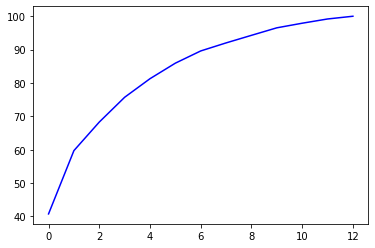

In [14]:
plt.plot(Var,color = 'blue')
plt.show()

### Creating Final Dataframe

In [15]:
final_df = pd.concat([wine_data['Type'],pd.DataFrame(x_pca[:,0:3],columns = ['PC1','PC2','PC3'])],axis = 1)
final_df

,Type,PC1,PC2,PC3
0,1,-0.706336,-0.253193,0.024093
1,1,-0.484977,-0.008823,-0.280482
2,1,-0.521172,-0.189187,0.196217
3,1,-0.821644,-0.580906,0.081110
4,1,-0.202546,-0.059467,0.300240
...,...,...,...,...
173,3,0.739510,-0.471901,0.209360
174,3,0.581781,-0.348366,0.083590
175,3,0.626313,-0.546857,-0.030495
176,3,0.572991,-0.425516,-0.094537


<AxesSubplot:>

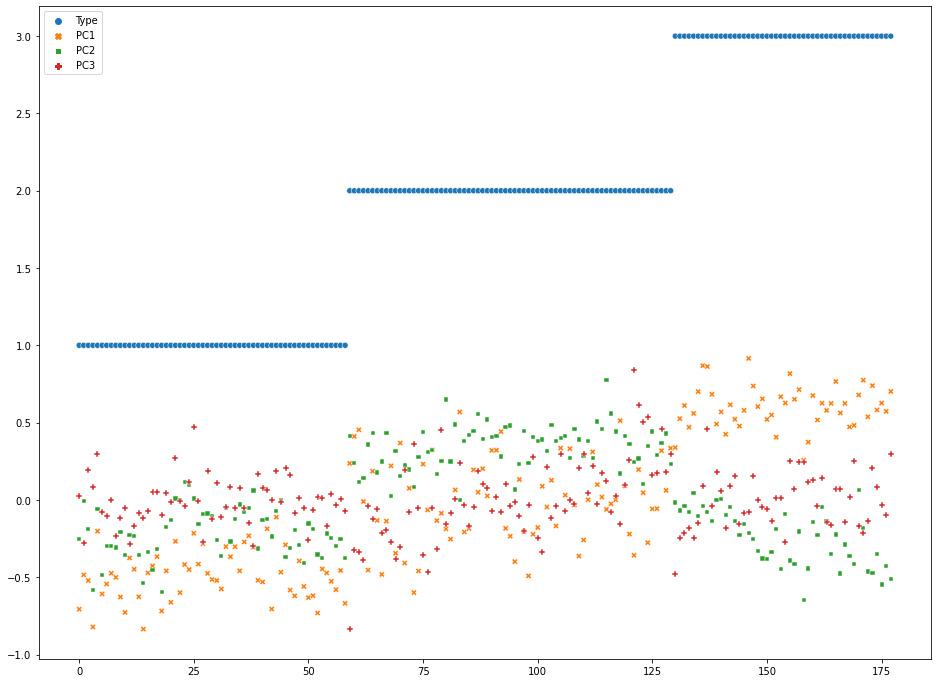

In [16]:
fig = plt.figure(figsize=(16,12))
sns.scatterplot(data = final_df)

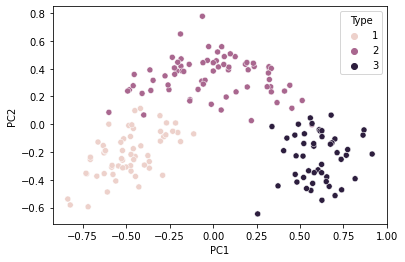

In [17]:
sns.scatterplot(data = final_df,x = 'PC1',y = 'PC2', hue = 'Type')
plt.show()

In [18]:
x_pca[:,0:1]

array([[-0.70633576],
       [-0.4849768 ],
       [-0.52117227],
       [-0.82164366],
       [-0.20254638],
       [-0.60819015],
       [-0.5440474 ],
       [-0.4743575 ],
       [-0.50043201],
       [-0.62751797],
       [-0.72746716],
       [-0.37496774],
       [-0.44818828],
       [-0.62634533],
       [-0.83571701],
       [-0.47193157],
       [-0.42699091],
       [-0.3665957 ],
       [-0.71878853],
       [-0.45888499],
       [-0.66185229],
       [-0.26790003],
       [-0.5997824 ],
       [-0.4178948 ],
       [-0.44994039],
       [-0.2157878 ],
       [-0.415532  ],
       [-0.28394697],
       [-0.47509923],
       [-0.51439647],
       [-0.52096581],
       [-0.57573823],
       [-0.30214464],
       [-0.36702197],
       [-0.30302247],
       [-0.45833888],
       [-0.27156632],
       [-0.23200419],
       [-0.3054804 ],
       [-0.51960503],
       [-0.53057511],
       [-0.18704453],
       [-0.7055082 ],
       [-0.1115173 ],
       [-0.46736065],
       [-0

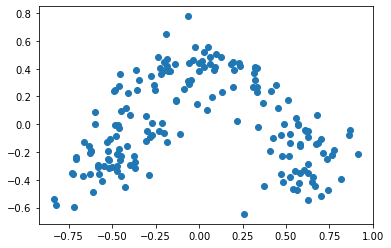

In [20]:
x = x_pca[:,0:1]
y = x_pca[:,1:2]
plt.scatter(x,y)
plt.show()

# 6. Checking with Clustering Algorithms

## 6.1 Hierarchical Clustering

### 6.1.1 Creating Dendogram

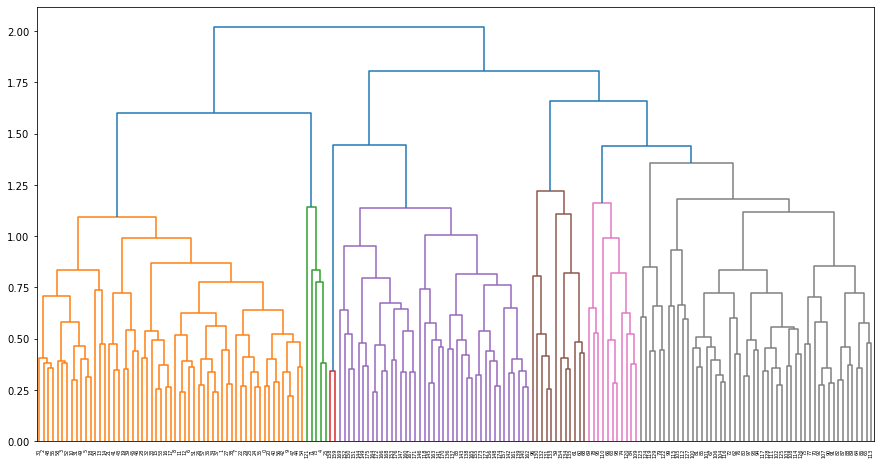

In [22]:
plt.figure(figsize=(15,8))
Dendogram = sch.dendrogram(sch.linkage(scaled_x,'complete'))
plt.show()

### 6.1.2 Creating Clusters

In [23]:
hclusters = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [24]:
y = pd.DataFrame(hclusters.fit_predict(scaled_x),columns = ['Clusterid'])
y['Clusterid'].value_counts()

0    71
2    57
1    50
Name: Clusterid, dtype: int64

### 6.1.3 Adding clusters to Data set

In [27]:
wine2 = wine_data.copy()
wine2['Clusterid'] = hclusters.labels_
wine2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


### 6.1.4 Plotting of Clusters

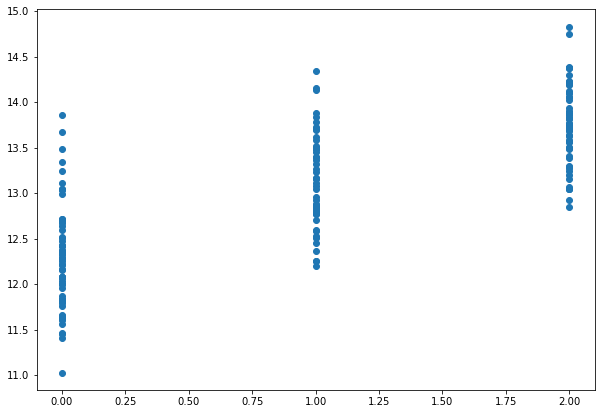

In [29]:
plt.figure(figsize=(10, 7))  
plt.scatter(wine2['Clusterid'],wine2['Alcohol']) 
plt.show()

## Inferrences : As we can clearly see that the clusters formed under hierarchy is very different from the clusters formed previously in the dataset. Thus, we can conclude that our clustering doesn't match with the original clustering.

## 6.2 K-Means Clustering

### 6.2.1 within-cluster sum-of-squares criterion 

In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(scaled_x)
    wcss.append(kmeans.inertia_)

In [33]:
wcss

[95.5995377847106,
 64.5376670238943,
 48.97029115513917,
 44.76933054082478,
 42.345386227153156]

### 6.2.2 Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

Text(0, 0.5, 'WCSS')

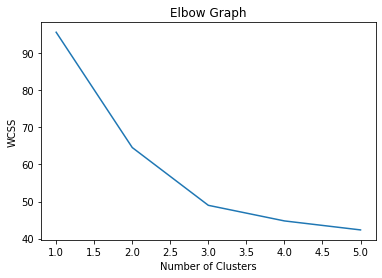

In [34]:
plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

## The above graph shows the optimum number of clusters is 3 , therefore we will build our clusters with n_clusters = 3

### 6.2.3 Building cluster using K-3

In [45]:
clusters3 = KMeans(3,random_state = 30).fit(scaled_x)
clusters3

KMeans(n_clusters=3, random_state=30)

In [46]:
clusters3.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### 6.2.4 Assign clusters to the Dataset

In [47]:
wine3=wine_data.copy()
wine3['clusters3id']=clusters3.labels_
wine3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters3id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [48]:
wine3['clusters3id'].value_counts()

0    62
2    61
1    55
Name: clusters3id, dtype: int64

## Inferrences : Though the optimum number of cluster is same as the original dataset, the values belonging to each dataset is different from the original dataset. 

# ===================== THE END =====================